# ENGR-E 533 Deep Learning Systems - Assignment 3

## Name : Akhila Sakiramolla (asakiram@iu.edu)
## UID : 2000886005

## Importing required libraries

In [70]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import cv2
import os
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import initializers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.callbacks import History 
from keras.layers.core import Dense, Activation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
!pip install tensorflow-addons
import tensorflow_addons as tfa

# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Problem 2: Self-Supervised Learning via Pretext Tasks

In [45]:
# Loading data

(x_train1, y_train1), (x_test, y_test) = cifar10.load_data()
x_train1.shape
y_train1.shape
x_test.shape
y_test.shape

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

In [46]:
# Separating validation set

x_train = x_train1[49500:50000]
y_train = y_train1[49500:50000]

x_train.shape
y_train.shape

(500, 32, 32, 3)

(500, 1)

In [47]:
# Class 0 dataset

x_train_class0 = x_train1[0:49500]
y_train_class0 = np.full((x_train_class0.shape[0],1), 0)
x_train_class0.shape, y_train_class0.shape

((49500, 32, 32, 3), (49500, 1))

In [48]:
# Class 1 dataset

x_train_class1 = []
for i in x_train_class0:
  x_train_class1.append(list(np.flipud(i)))
x_train_class1 = np.array(x_train_class1)

y_train_class1 = np.full((x_train_class1.shape[0],1), 1)

x_train_class1.shape, y_train_class1.shape

((49500, 32, 32, 3), (49500, 1))

In [49]:
# Class 2 dataset

x_train_class2 = []
for i in x_train_class0:
  x_train_class2.append(list(np.rot90(i)))
x_train_class2 = np.array(x_train_class2)

y_train_class2 = np.full((x_train_class2.shape[0],1), 2)

x_train_class2.shape, y_train_class2.shape

((49500, 32, 32, 3), (49500, 1))

Text(0.5, 1.0, 'Class 0')

Text(0.5, 1.0, 'Class 1')

Text(0.5, 1.0, 'Class 2')

<function matplotlib.pyplot.show(*args, **kw)>

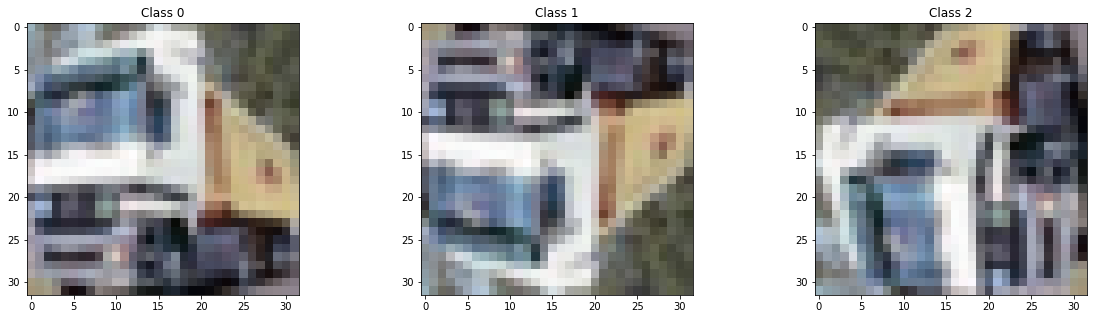

In [50]:
# Plotting images 

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.imshow(x_train_class0[1], interpolation='nearest')
ax1.set_title("Class 0")
ax2.imshow(x_train_class1[1], interpolation='nearest')
ax2.set_title("Class 1")
ax3.imshow(x_train_class2[1], interpolation='nearest')
ax3.set_title("Class 2")
plt.show

In [51]:
# Concating the datasets

X_train = np.vstack((x_train_class0,x_train_class1,x_train_class2))
Y_train = np.vstack((y_train_class0,y_train_class1,y_train_class2))
X_train.shape, Y_train.shape

((148500, 32, 32, 3), (148500, 1))

In [52]:
# Scaling pixel values between -1 and 1 and coverting labels to categorical

X_train = (2*(X_train/255))-1
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=3)
X_train.min(), X_train.max()

(-1.0, 1.0)

In [53]:
# Building the model

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(10, kernel_size=(5,5), activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(), strides = 1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(10, kernel_size=(5,5),activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(), strides = 1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten(name = "flatten"))
model.add(Dense(20, activation='relu', kernel_initializer = tf.keras.initializers.HeNormal()))
model.add(Dense(3, activation='softmax', kernel_initializer = tf.keras.initializers.HeNormal()))


In [54]:
# Calculating loss and optimizing it

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Fitting the model

hist1 = History()
model.fit(X_train, Y_train, batch_size=512, epochs=100,callbacks=[hist1])

Epoch 1/100
291/291 [==============================] - 3s 8ms/step - loss: 0.8918 - accuracy: 0.5641
Epoch 2/100
291/291 [==============================] - 3s 9ms/step - loss: 0.7918 - accuracy: 0.6411
Epoch 3/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7607 - accuracy: 0.6595
Epoch 4/100
291/291 [==============================] - 2s 8ms/step - loss: 0.7384 - accuracy: 0.6720
Epoch 5/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7192 - accuracy: 0.6815
Epoch 6/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7062 - accuracy: 0.6879
Epoch 7/100
291/291 [==============================] - 2s 7ms/step - loss: 0.6914 - accuracy: 0.6959
Epoch 8/100
291/291 [==============================] - 2s 7ms/step - loss: 0.6812 - accuracy: 0.7010
Epoch 9/100
291/291 [==============================] - 2s 7ms/step - loss: 0.6694 - accuracy: 0.7063
Epoch 10/100
291/291 [==============================] - 2s 7ms/step - loss: 0.6620 - accura

Text(0.5, 1.0, 'Training Accuracy')

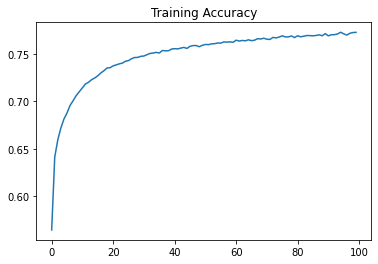

In [56]:
# Plotting the accuracy

hist1 = hist1.history
accuracy = hist1['accuracy']
plt.plot(accuracy)
plt.title('Training Accuracy')

In [57]:
# Saving the weights from the model

model.save_weights('model_weights',save_format='h5')

In [58]:
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((500, 32, 32, 3), (500, 1))

((10000, 32, 32, 3), (10000, 1))

In [59]:
# Scaling pixel values between -1 and 1 and coverting labels to categorical

x_train = (2*(x_train/255))-1
x_test = (2*(x_test/255))-1
x_train.min(), x_train.max()

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

(-1.0, 1.0)

In [76]:
# Building the model

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(10, kernel_size=(5,5), activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(), strides = 1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(10, kernel_size=(5,5),activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(), strides = 1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten(name = "flatten"))
model.add(Dense(20, activation='relu', kernel_initializer = tf.keras.initializers.HeNormal()))
model.add(Dense(10, activation='softmax', kernel_initializer = tf.keras.initializers.HeNormal()))


In [77]:
# Calculating loss and optimizing it

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
# Fitting the model

hist2 = History()
model.fit(x_train, y_train, batch_size=500, epochs=10000, validation_data=(x_test, y_test),callbacks=[hist2], validation_freq = 100,verbose = 0)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

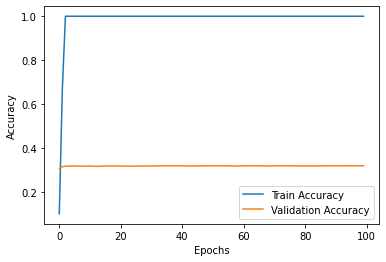

In [79]:
# Plotting the accuarcy for baseline model

hist2 = hist2.history
train_accuracy = hist2['accuracy'][::100]
val_accuracy = hist2['val_accuracy']
base_accuracy = pd.DataFrame(list(zip(train_accuracy, val_accuracy)),columns =['train_accuracy', 'val_accuracy'])

plt.plot(train_accuracy, label = "Train Accuracy")
plt.plot(val_accuracy, label = "Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [80]:
# Building the model

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(10, kernel_size=(5,5), activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(), strides = 1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(10, kernel_size=(5,5),activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(), strides = 1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten(name = "flatten"))
model.add(Dense(20, activation='relu', kernel_initializer = tf.keras.initializers.HeNormal()))
model.add(Dense(10, activation='softmax', kernel_initializer = tf.keras.initializers.HeNormal()))


In [81]:
# Calculating loss and optimizing it by using transfer learning

opt = [tf.keras.optimizers.Adam(learning_rate=1e-7), tf.keras.optimizers.Adam(learning_rate=1e-3)]
opt_and_layers = [(opt[0], model.layers[0]),(opt[0], model.layers[2]),(opt[0], model.layers[5]), (opt[1], model.layers[6])]
optimizer = tfa.optimizers.MultiOptimizer(opt_and_layers)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('pretext_weights',by_name=True)

In [85]:
# Fitting the model

history = History()
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10000, callbacks=[history], batch_size=512, validation_freq=100, verbose = 0)

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation Acc. (%)')

Text(0.5, 1.0, 'Model Performance')

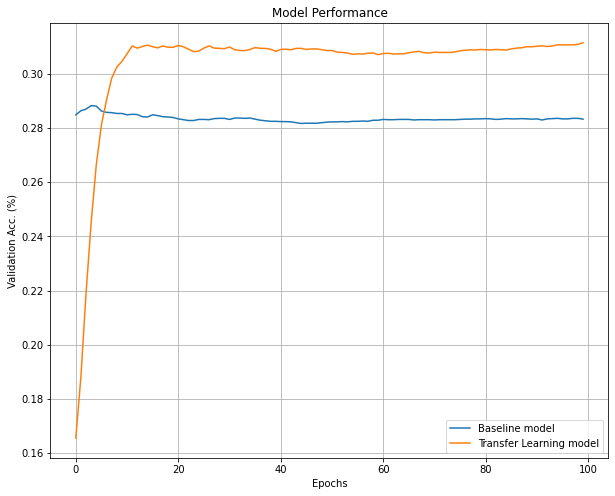

In [44]:
# Plotting the accurayc for baseline and transfer learning models

hist = history.history
train_accuracy = history['accuracy'][::100]
val_accuracy = history['val_accuracy']
transfer_accuracy = pd.DataFrame(list(zip(train_accuracy, val_accuracy)), columns =['train_accuracy', 'val_accuracy'])

plt.plot(base_accuracy['val_accuracy'], label = 'Baseline model')
plt.plot(transfer_accuracy['val_accuracy'], label = "Transfer Learning model")
plt.xlabel('Epochs')
plt.ylabel('Validation Acc. (%)')
plt.title('Model Performance')
plt.legend()
plt.grid()